# Boosting Extras

**OBJECTIVES**

1. Use `sklearn`'s Histogram-Based Gradient Boosting estimator
2. Discuss results of boosted models using partial dependence plots

In [25]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import AdaBoostClassifier, AdaBoostRegressor, GradientBoostingClassifier, GradientBoostingRegressor, HistGradientBoostingClassifier, HistGradientBoostingRegressor, RandomForestClassifier, RandomForestRegressor
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.inspection import plot_partial_dependence

### Fetch the Cali Housing Data

In [26]:
cali = fetch_california_housing()

In [27]:
X, y = pd.DataFrame(cali.data, columns = cali.feature_names), cali.target

##### Train/Test Split

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 22)

##### Gradient Booster

In [29]:
#bring in gradient boosting regressor 
gboost = GradientBoostingRegressor()

In [30]:
#fit the model 
gboost.fit(X_train, y_train)

GradientBoostingRegressor()

In [31]:
#score the model on train data
gboost.score(X_train, y_train)

0.8048900783397128

In [32]:
#score on test
gboost.score(X_test, y_test)

0.7904592801588967

##### Grid Search

In [33]:
#grid search some basic parameters
params = {'n_estimators': [10, 50, 100],
         'learning_rate': [0.01, 0.1, 1.0, 5.0],
         'loss': ['ls', 'huber', 'quantile'], 
         'max_depth': [1, 2, 3, 4, 5],
         'ccp_alpha': [0.01, 0.1, 1.0, 10.0]}

In [35]:
grid = GridSearchCV(gboost, param_grid=params, n_jobs = -1, verbose = 2)

In [36]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 720 candidates, totalling 3600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 130 tasks      | elapsed:   15.4s
[Parallel(n_jobs=-1)]: Done 333 tasks      | elapsed:   36.5s
[Parallel(n_jobs=-1)]: Done 616 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 981 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 1426 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 1953 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 2560 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 3249 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 3600 out of 3600 | elapsed:  5.9min finished


GridSearchCV(estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'ccp_alpha': [0.01, 0.1, 1.0, 10.0],
                         'learning_rate': [0.01, 0.1, 1.0, 5.0],
                         'loss': ['ls', 'huber', 'quantile'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'n_estimators': [10, 50, 100]},
             verbose=2)

In [37]:
grid.score(X_train, y_train)

0.6796856988495674

In [38]:
grid.score(X_test, y_test)

0.6778035126885447

### `HistGradientBoostingRegressor`

In [39]:
#build a HistGradientBoostingRegressor
hboost = HistGradientBoostingRegressor()
hboost.fit(X_train, y_train)
hboost.score(X_test, y_test)

0.8369000092818525

In [40]:
#score on train/test
hboost.score(X_train, y_train)

0.8807111189986363

In [41]:
#examine feature importances
importances = gboost.feature_importances_
features = cali.feature_names

<BarContainer object of 8 artists>

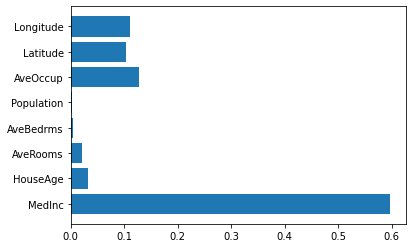

In [42]:
plt.barh(features, importances)

### Partial Dependence Plots

Recall that our tree models and their boosted variants are non-parametric.  This means that we do not have a coefficient, however we can mimic this notion by seeing how predictions change as you run through a range of values of an input as you hold all other features as they are. This is how we get our partial dependence plots.  Formally, we have

$$\bar{f_S}(X_S) = \frac{1}{N}\sum_{i = 1}^N f(X_S, x_{iC})$$

where ${x_{1C}, x_{2C}, ..., x_{NC}}$ are the values of $X_C$ occurring in the training data.

In [45]:
#select four non-location based features
features = ['MedInc', 'AveOccup', 'HouseAge', 'AveRooms']

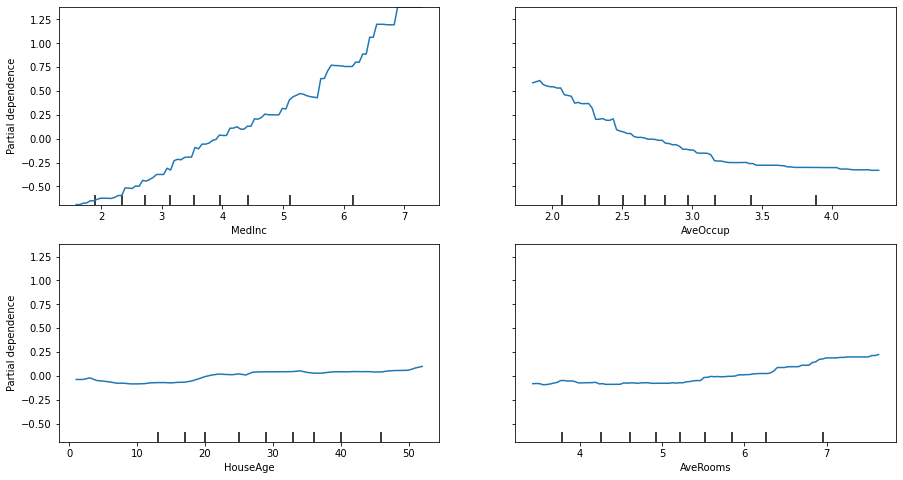

In [47]:
#examine partial dependence plots
fig, ax = plt.subplots(figsize = (15, 8))
plot_partial_dependence(hboost, X_train, features = features, ax = ax, n_cols=2)

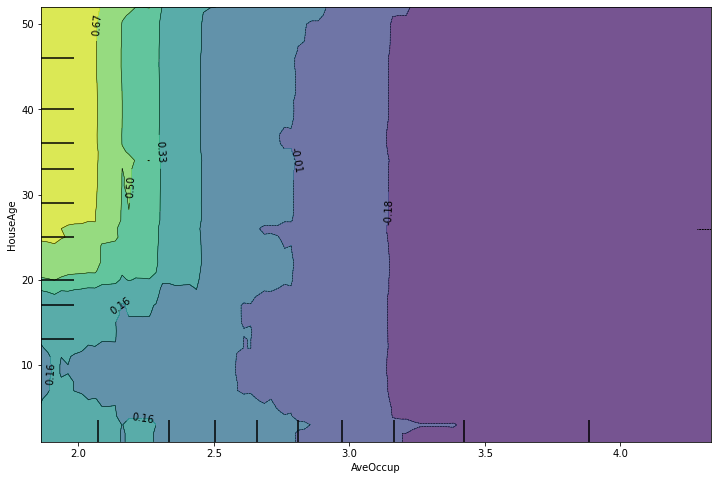

In [48]:
#what does it mean -- interactions?!
fig, ax = plt.subplots(figsize = (12, 8))
plot_partial_dependence(hboost, X_train, [('AveOccup', 'HouseAge')], ax = ax)

### Viewing in 3D

In [49]:
from mpl_toolkits.mplot3d import Axes3D

In [50]:
from sklearn.inspection import partial_dependence

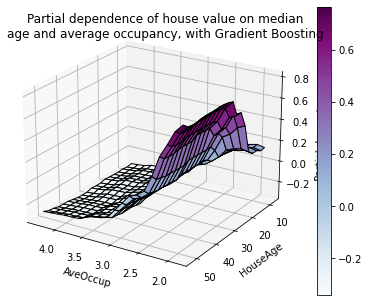

In [52]:
fig = plt.figure()

features = ('AveOccup', 'HouseAge')
pdp, axes = partial_dependence(hboost, X_train, features=features,
                               grid_resolution=20)
XX, YY = np.meshgrid(axes[0], axes[1])
Z = pdp[0].T
ax = Axes3D(fig)
surf = ax.plot_surface(XX, YY, Z, rstride=1, cstride=1,
                       cmap=plt.cm.BuPu, edgecolor='k')
ax.set_xlabel(features[0])
ax.set_ylabel(features[1])
ax.set_zlabel('Partial dependence')
#  pretty init view
ax.view_init(elev=22, azim=122)
plt.colorbar(surf)
plt.suptitle('Partial dependence of house value on median\n'
             'age and average occupancy, with Gradient Boosting')
plt.subplots_adjust(top=0.9)

### Partial Dependence on KNN

In [22]:
from sklearn.neighbors import KNeighborsRegressor

In [23]:
#fit a knn model


KNeighborsRegressor()

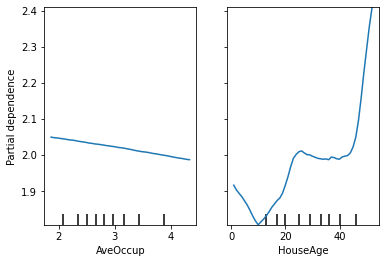

In [24]:
#look at partial dependence
